In [32]:
import pandas as pd
import numpy as np

In [33]:
col_names = ['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 
             'liver big', 'liver firm', 'spleen palpable', 'spiders', 'ascites', 'varices', 
             'bilirubin', 'alk phosphate', 'sgot', 'albumin', 'protime', 'histology']


In [34]:
df = pd.read_csv("hepatitis.csv", names=col_names, na_values="?", sep=",")
df

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver big,liver firm,spleen palpable,spiders,ascites,varices,bilirubin,alk phosphate,sgot,albumin,protime,histology
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


### Data cleaning(Remove NA, ?, Negative values etc.)

In [35]:
df.columns.unique()

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver big', 'liver firm', 'spleen palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [36]:
df.isna().sum()

class               0
age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver big          10
liver firm         11
spleen palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk phosphate      29
sgot                4
albumin            16
protime            67
histology           0
dtype: int64

In [37]:
numerical_columns = [ 'bilirubin', 'alk phosphate', 'sgot', 'albumin', 'protime']
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Fill missing values in categorical columns with mode
categorical_columns = ['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia', 'liver big', 'liver firm', 
                     'spleen palpable', 'spiders', 'ascites', 'varices', 'histology']
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


In [38]:
df.isna().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver big          0
liver firm         0
spleen palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

In [39]:
for col in df.columns:
    print(col, df[col].unique())

class [2 1]
age [30 50 78 31 34 51 23 39 32 41 47 38 66 40 22 27 42 25 49 58 61 62 26 35
 37 20 65 52 33 56 28 36 44 64 45 57 24 67 59 60 48 54  7 69 72 70 46 53
 43]
sex [2 1]
steroid [1. 2.]
antivirals [2 1]
fatigue [2. 1.]
malaise [2. 1.]
anorexia [2. 1.]
liver big [1. 2.]
liver firm [2. 1.]
spleen palpable [2. 1.]
spiders [2. 1.]
ascites [2. 1.]
varices [2. 1.]
bilirubin [1.         0.9        0.7        1.42751678 1.3        2.2
 2.         1.2        0.6        0.4        0.8        1.4
 2.3        0.5        0.3        4.6        1.8        3.5
 4.1        1.6        2.8        1.5        2.5        3.
 4.8        2.4        1.7        1.1        3.2        2.9
 8.         3.9        1.9        4.2        7.6       ]
alk phosphate [ 85.         135.          96.          46.         105.32539683
  95.          78.          59.          81.          57.
  72.         102.          62.          53.          70.
  48.         133.          60.          45.         175.
 280.       

In [42]:
# checking for negative values
for i, col in enumerate(df.columns):
    print(col, df[df[col]<0].count())
# no negative values

class class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver big          0
liver firm         0
spleen palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64
age class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver big          0
liver firm         0
spleen palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64
sex class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue        

### Error correcting(Outlier detection and removal)

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

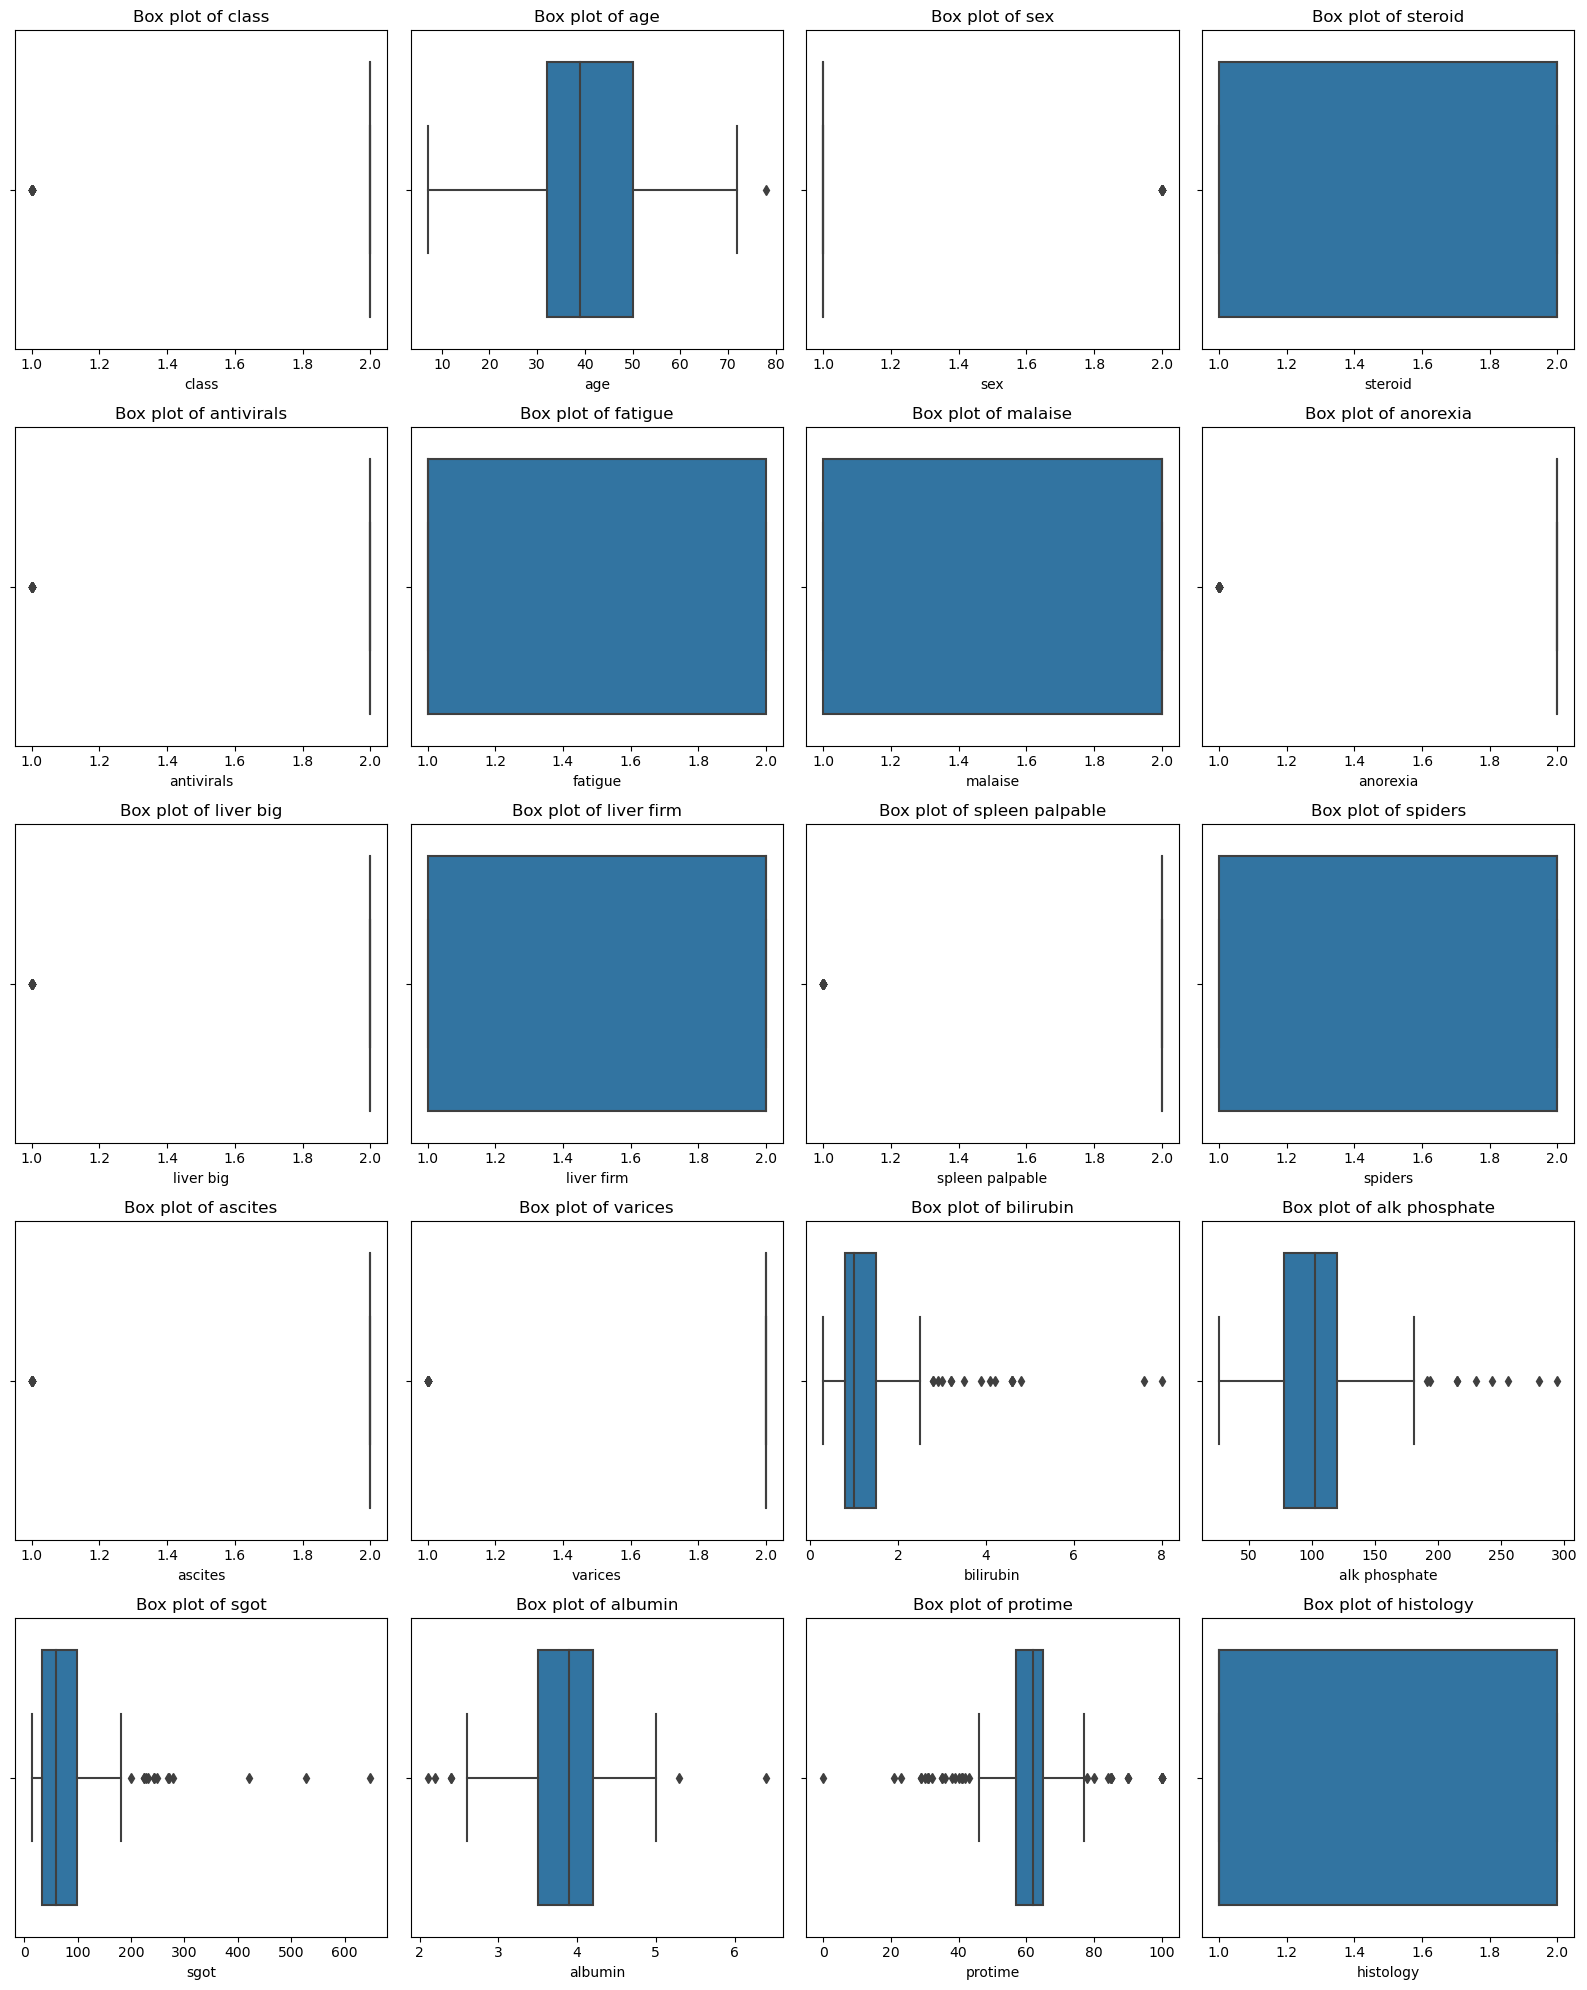

In [45]:
def vis_outlier(df):
    n = len(df.select_dtypes(include=["float64", "int64"]).columns)
    row = (n+3)//4
    col = min(n, 4)

    fig, axes = plt.subplots(row, col, figsize=(16, 4*row))

    axes = axes.flatten()

    for i, col in enumerate(df.select_dtypes(include=["float64", "int64"]).columns):
        sns.boxplot(ax=axes[i], x=df[col])
        axes[i].set_title(f'Box plot of {col}')
        axes[i].set_xlabel(col)
    
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    plt.tight_layout()
    plt.show()
vis_outlier(df)

In [46]:
def outliers(df, ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr 

    lst  = df.index[ (df[ft] < lower_bound) | (df[ft]>upper_bound)]
    return lst

Int64Index([4, 11, 47, 72, 76, 81, 102, 103, 107, 108, 123, 132, 147, 150], dtype='int64')

In [49]:
index_list = []
for i, col in enumerate(df.select_dtypes(include=["int64", "float64"]).columns):
    index_list.extend(outliers(df, col))

In [51]:
def remove(df, lst):
    lst = sorted(set(lst))
    df = df.drop(lst)
    return df
dfcleaned = remove(df, index_list)

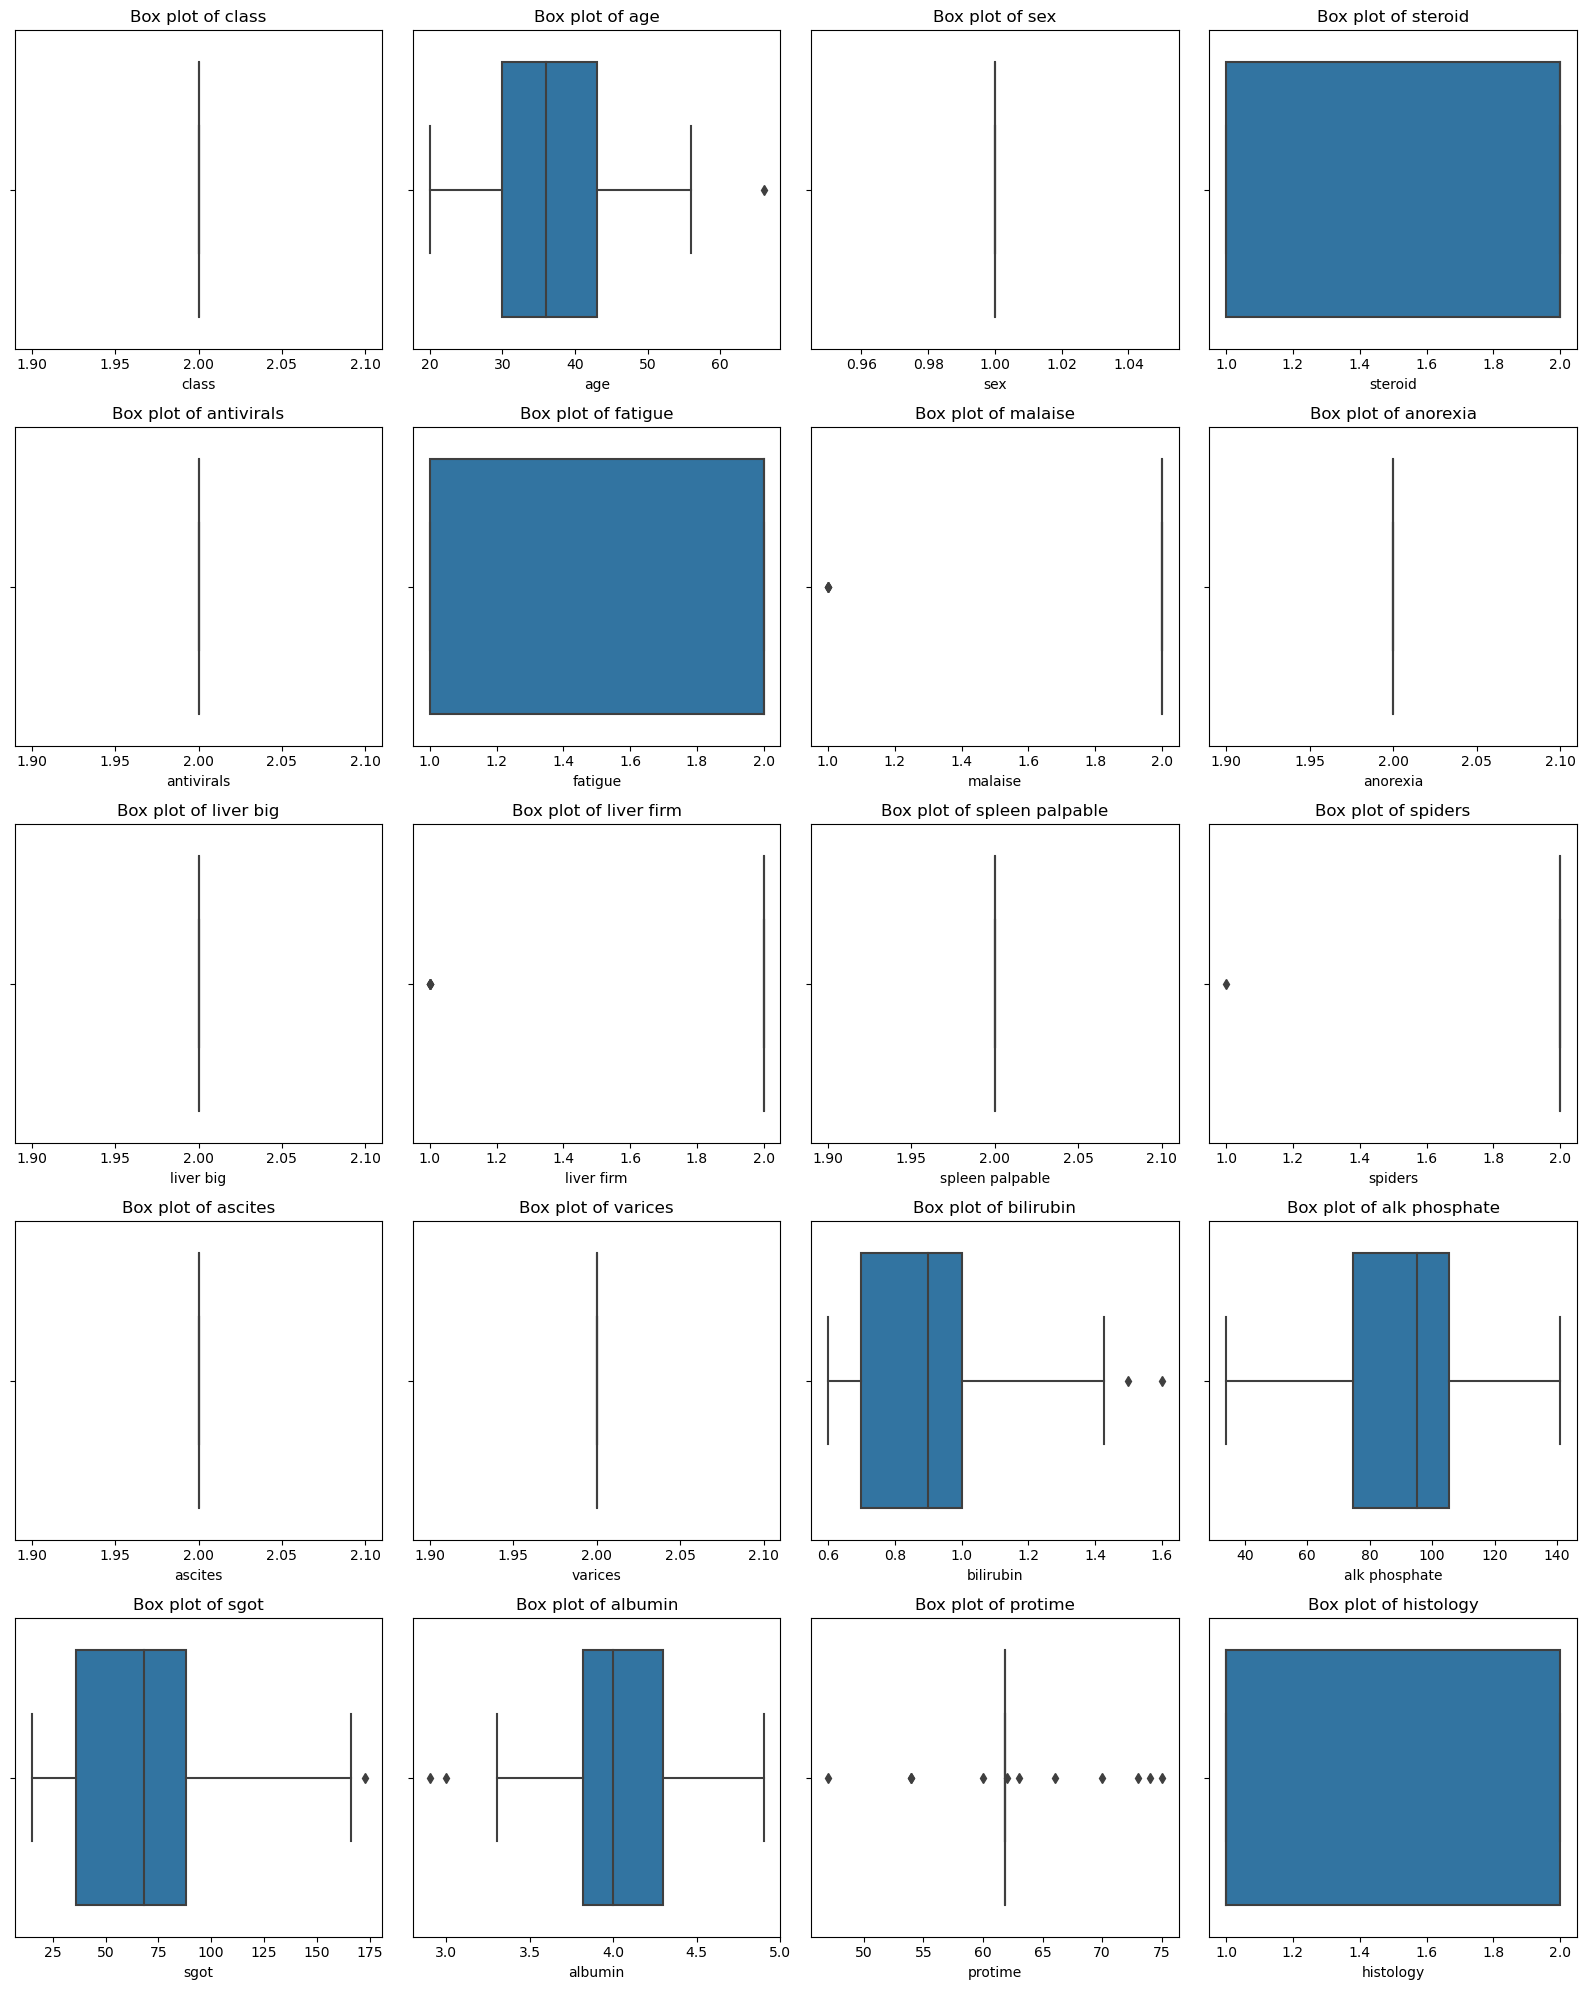

In [52]:
vis_outlier(dfcleaned)

In [71]:
dfcleaned.shape

(35, 20)

### Data transformation

1. One-Hot Encoding:
    - One-hot encoding is used to convert categorical variables into a binary matrix, where each category becomes a separate binary feature.
    - Each category is represented by a binary column, where a value of 1 indicates the presence of the category and 0 indicates absence.
    - This technique is useful when there is no ordinal relationship between categories.
2. Label Encoding:
    - Label encoding is used to convert categorical variables into numerical labels.
    - Each category is assigned a unique integer value.
    - This technique is suitable when there is an ordinal relationship between categories.

In [69]:
from sklearn.preprocessing import LabelEncoder

In [73]:
le = LabelEncoder()
le.fit(df['class'])
le.classes_

array([1, 2], dtype=int64)

In [ ]:
df['class'] = le.transform(df['class'])

In [76]:
df['class'].unique()

array([1, 0], dtype=int64)

### Build Data model using regression and Naïve Bayes methods for prediction class DIE, LIVE and compare accuracy Prediction.

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [77]:
X = df.drop('class', axis=1)
Y = df['class']

In [78]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [79]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.25, random_state=42)

In [80]:
lr = LogisticRegression()
lr.fit(train_x, train_y)

c:\Users\mansi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
logi_y_pred = lr.predict(test_x)

In [83]:
logi_acc = accuracy_score(test_y, logi_y_pred)
logi_acc

0.8205128205128205

In [84]:
nb = GaussianNB()
nb.fit(train_x, train_y)

GaussianNB()

In [86]:
nb_y_pred = nb.predict(test_x)

In [87]:
nb_acc = accuracy_score(test_y, nb_y_pred)
nb_acc

0.7948717948717948

### Melting Data to long format
- "Pivoting" the data means reorganizing it so that each unique observation is represented by a single row, and each variable is in a separate column. This is often referred to as "long" format.
- So, "unpivoting" (which is what pandas.melt() does) is the process of transforming data from wide format to long format. It takes columns and turns them into rows.

In [88]:
df_melted = pd.melt(df, id_vars=["class"], var_name="Attribute")
df_melted

,class,Attribute,value
0,1,age,30.0
1,1,age,50.0
2,1,age,78.0
3,1,age,31.0
4,1,age,34.0
...,...,...,...
2940,0,histology,2.0
2941,1,histology,2.0
2942,1,histology,2.0
2943,1,histology,2.0


### Casting data to wide format

In [89]:
casted_df = df_melted.pivot_table(index="class", columns='Attribute', values='value', aggfunc='mean')
casted_df

Attribute,age,albumin,alk phosphate,anorexia,antivirals,ascites,bilirubin,fatigue,histology,liver big,liver firm,malaise,protime,sex,sgot,spiders,spleen palpable,steroid,varices
class,,,,,,,,,,,,,,,,,,,
0,46.593750,3.255823,118.112599,1.687500,1.937500,1.56250,2.473595,1.062500,1.781250,1.906250,1.593750,1.281250,51.529119,1.000000,98.962127,1.312500,1.625000,1.375000,1.656250
1,39.796748,3.963333,101.998645,1.821138,1.821138,1.95122,1.155366,1.422764,1.365854,1.821138,1.617886,1.691057,64.537971,1.130081,82.494212,1.764228,1.853659,1.544715,1.943089
